# Natural Language Processing in Financial Applications

## Step 1: Prepare the dataset for analysis

In [1]:
#Importing libraries

import lbsa
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Lets check how the NRC word-emotion association lexicon looks like

sa_lexicon = lbsa.get_lexicon('sa', language='english', source='nrc')
sa_lexicon.dataframe

,english,arabic,basque,bengali,catalan,chinese (simplified),chinese (traditional),danish,dutch,esperanto,...,yiddish,zulu,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,aback,الى الوراء,aback,পশ্চাতে,darrere,吓了一跳,嚇了一跳,overrasket,verrast,surprizita,...,אַבאַק,kwabamangaza,0,0,0,0,0,0,0,0
1,abacus,طبلية تاج,abako,গণনা-যন্ত্রবিশেষ,àbac,算盘,算盤,abacus,abacus,abako,...,ABACUS,abacus,0,0,0,0,0,0,0,1
2,abandon,تخلى,alde batera utzi,বর্জিত করা,abandonar,放弃,放棄,opgive,verlaten,forlasos,...,פאַרלאָזן,shiya,0,0,0,1,0,1,0,0
3,abandoned,مهجور,abandonatu,পরিত্যক্ত,abandonat,弃,棄,forladte,verlaten,forlasita,...,פֿאַרלאָזן,ishiywe,1,0,0,1,0,1,0,0
4,abandonment,هجر,abandono,বিসর্জন,abandonament,放弃,放棄,opgivelse,verlatenheid,forlasas,...,אַבאַנדאַנמאַנט,Ukuyekwa,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14177,zone,المنطقة,NaN,মণ্ডল,NaN,区,NaN,NaN,zone,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
14178,zoo,حديقة الحيوانات,NaN,চিড়িয়াখানা,NaN,动物园,動物園,NaN,dierentuin,bestoĝardeno,...,NaN,NaN,0,0,0,0,0,0,0,0
14179,zoological,حيواني,NaN,NaN,NaN,动物学,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
14180,zoology,علم الحيوان,NaN,NaN,NaN,动物学,NaN,NaN,NaN,NaN,...,זאָואַלאַדזשי,NaN,0,0,0,0,0,0,0,0


In [4]:
#Importing the dataset

train = pd.read_csv('Corona_NLP_train.csv', nrows=2000, encoding = 'latin-1')

In [26]:
train.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
train.columns = ['OriginalTweet','Sentiment']

ValueError: Length mismatch: Expected axis has 6 elements, new values have 2 elements

## Step 2: Extract lexicon based features

In [6]:
afinn_lexicon = lbsa.get_lexicon('opinion', language='english', source='afinn')
nrc_lexicon = lbsa.get_lexicon('opinion', language='english', source='nrc')
nrc_sa_lexicon = lbsa.get_lexicon('sa', language='english', source='nrc')
mpqa_lexicon = lbsa.get_lexicon('opinion', language='english', source='mpqa')

In [7]:
sa_extractor = lbsa.FeatureExtractor(afinn_lexicon, nrc_lexicon, nrc_sa_lexicon, mpqa_lexicon)
feat_dat = pd.DataFrame(sa_extractor.process(train['OriginalTweet']),columns=sa_extractor.feature_names)

In [8]:
feat_dat

,afinn_positive,afinn_negative,nrc_positive,nrc_negative,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_sadness,nrc_surprise,nrc_trust,mpqa_positive,mpqa_negative,mpqa_strong_subjectivty
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,5.0,2.0,0.0,0.0
2,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
3,4.0,4.0,5.0,2.0,1.0,0.0,0.0,2.0,3.0,1.0,0.0,4.0,4.0,2.0,4.0
4,1.0,6.0,2.0,3.0,2.0,1.0,0.0,3.0,1.0,2.0,0.0,2.0,2.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1996,1.0,5.0,3.0,3.0,1.0,2.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
1997,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1998,0.0,4.0,3.0,3.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,3.0,0.0,3.0,2.0


Descriptive stats for afinn_positive
------------------------------------
                    count      mean       std  min  25%  50%  75%   max
Sentiment                                                              
Extremely Negative  306.0  0.862745  1.350453  0.0  0.0  0.0  2.0   7.0
Extremely Positive  290.0  4.465517  2.565512  0.0  3.0  4.0  6.0  16.0
Negative            513.0  0.957115  1.381417  0.0  0.0  0.0  2.0   7.0
Neutral             356.0  0.238764  0.886050  0.0  0.0  0.0  0.0  11.0
Positive            535.0  2.042991  1.680473  0.0  1.0  2.0  3.0  10.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


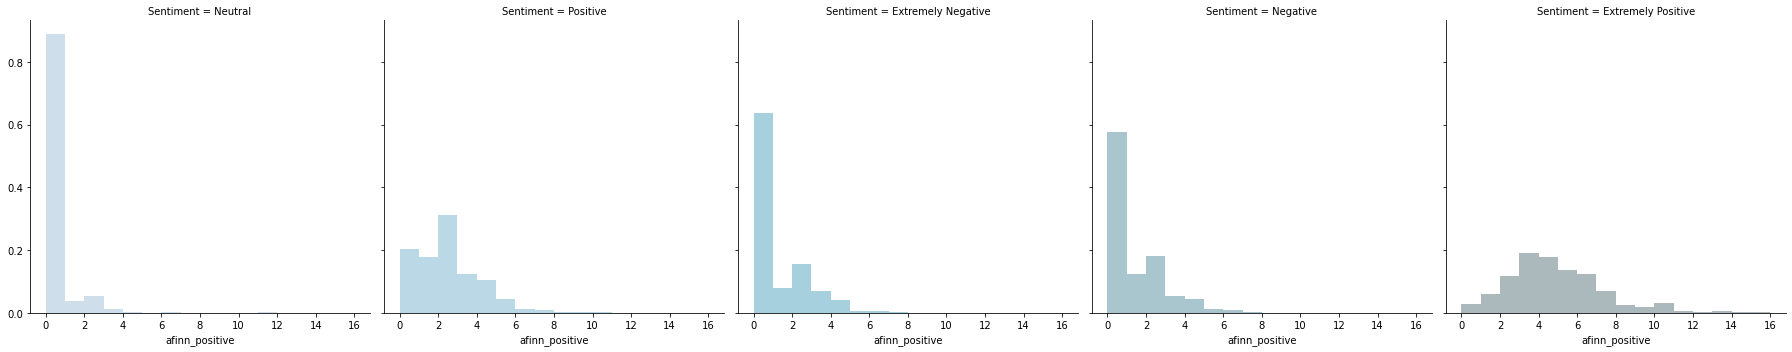

Descriptive stats for afinn_negative
------------------------------------
                    count      mean       std  min  25%  50%  75%   max
Sentiment                                                              
Extremely Negative  306.0  6.581699  3.184212  0.0  4.0  6.0  8.0  19.0
Extremely Positive  290.0  1.003448  1.592583  0.0  0.0  0.0  2.0   9.0
Negative            513.0  2.961014  2.487948  0.0  1.0  3.0  4.0  31.0
Neutral             356.0  0.373596  1.003251  0.0  0.0  0.0  0.0   7.0
Positive            535.0  1.263551  1.651148  0.0  0.0  1.0  2.0  11.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


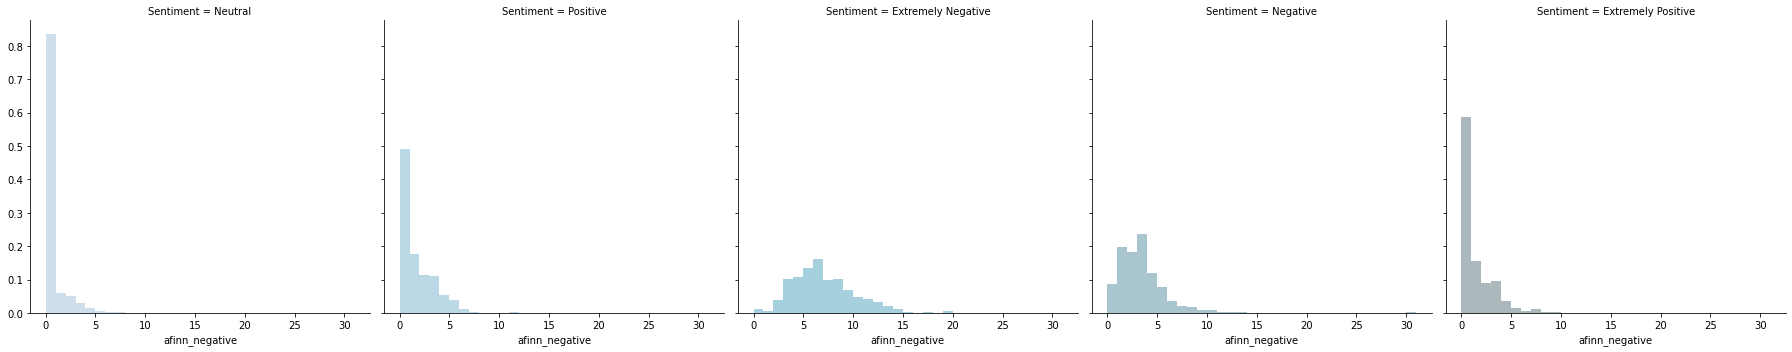

Descriptive stats for nrc_positive
----------------------------------
                    count      mean       std  min  25%  50%  75%   max
Sentiment                                                              
Extremely Negative  306.0  1.986928  1.432581  0.0  1.0  2.0  3.0   7.0
Extremely Positive  290.0  2.962069  1.725629  0.0  2.0  3.0  4.0   9.0
Negative            513.0  1.904483  1.445845  0.0  1.0  2.0  3.0   8.0
Neutral             356.0  1.286517  1.182948  0.0  0.0  1.0  2.0   7.0
Positive            535.0  2.119626  1.517898  0.0  1.0  2.0  3.0  10.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


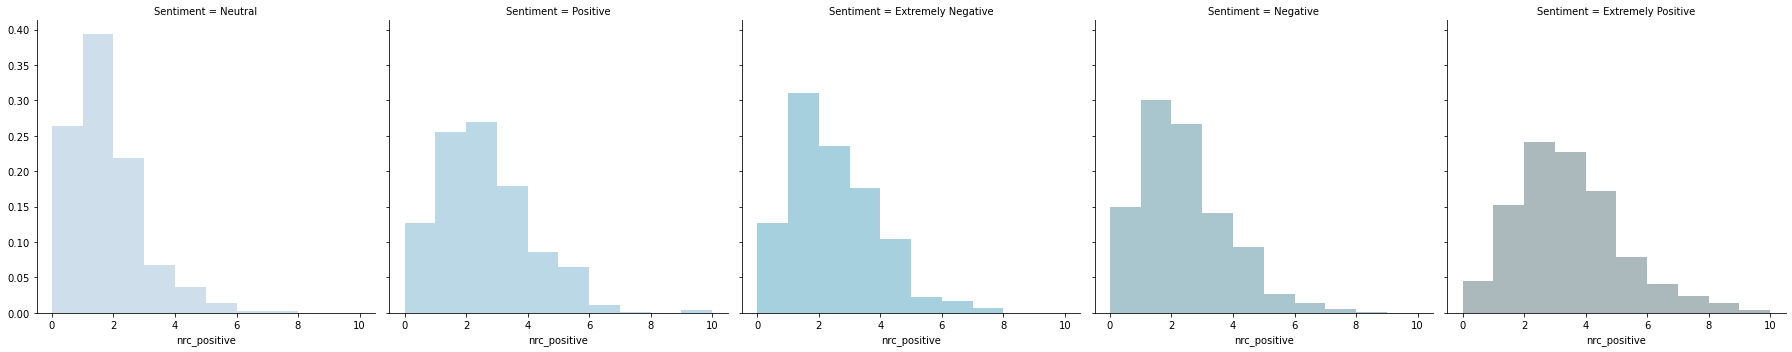

Descriptive stats for nrc_negative
----------------------------------
                    count      mean       std  min  25%  50%   75%  max
Sentiment                                                              
Extremely Negative  306.0  2.637255  1.465153  0.0  2.0  3.0  3.75  7.0
Extremely Positive  290.0  0.858621  1.060788  0.0  0.0  1.0  1.00  6.0
Negative            513.0  1.452242  1.158427  0.0  1.0  1.0  2.00  8.0
Neutral             356.0  0.505618  0.799628  0.0  0.0  0.0  1.00  4.0
Positive            535.0  0.887850  1.036118  0.0  0.0  1.0  1.00  6.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


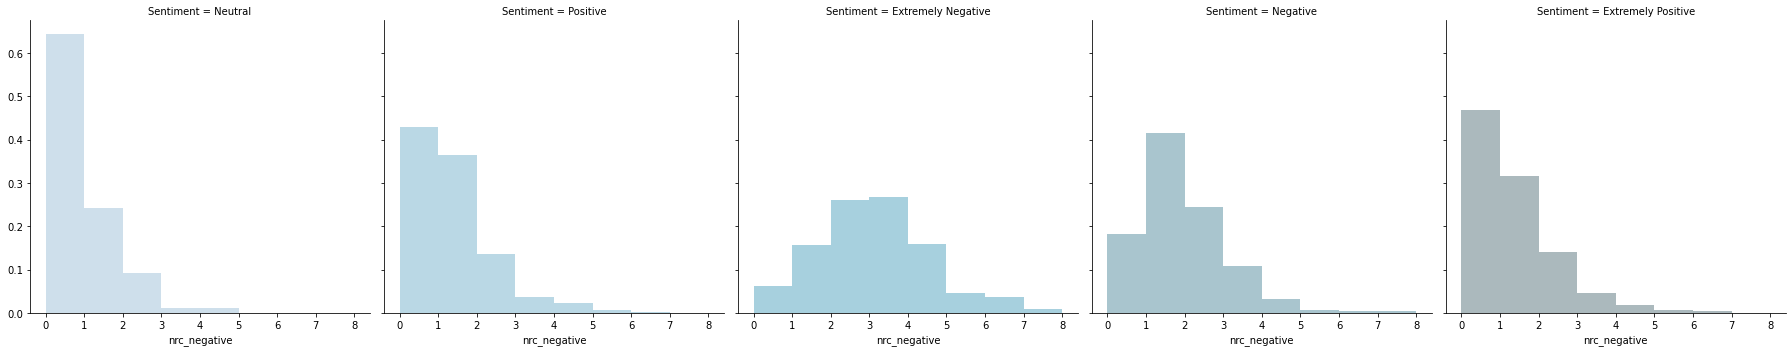

Descriptive stats for nrc_anger
-------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  0.947712  0.980404  0.0  0.0  1.0  2.0  4.0
Extremely Positive  290.0  0.213793  0.465951  0.0  0.0  0.0  0.0  3.0
Negative            513.0  0.499025  0.739839  0.0  0.0  0.0  1.0  5.0
Neutral             356.0  0.120787  0.389316  0.0  0.0  0.0  0.0  4.0
Positive            535.0  0.246729  0.525442  0.0  0.0  0.0  0.0  3.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


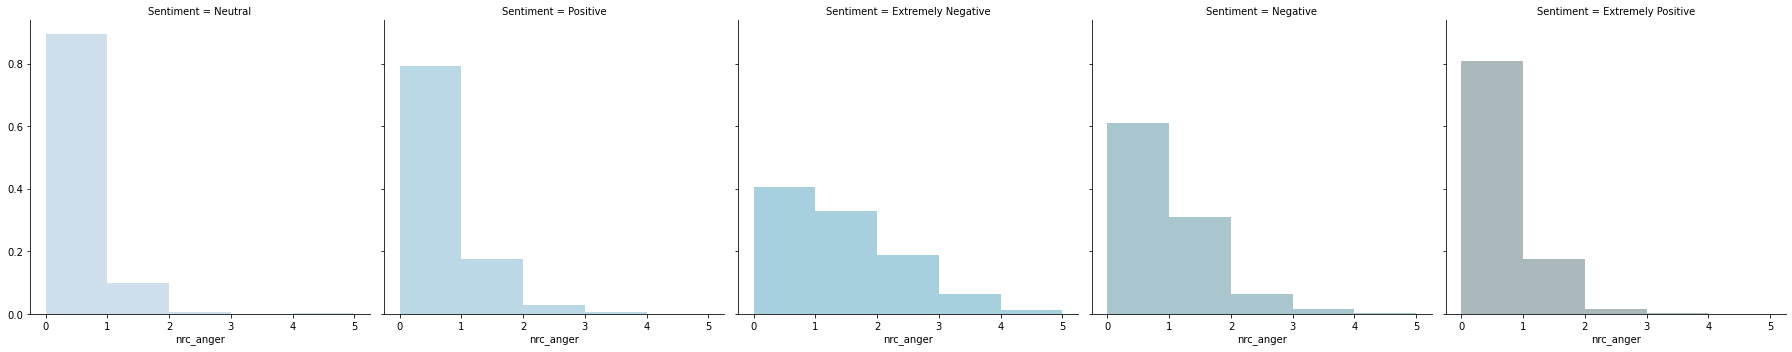

Descriptive stats for nrc_anticipation
--------------------------------------
                    count      mean       std  min   25%  50%  75%  max
Sentiment                                                              
Extremely Negative  306.0  0.908497  1.013738  0.0  0.00  1.0  1.0  6.0
Extremely Positive  290.0  1.351724  1.149882  0.0  0.25  1.0  2.0  5.0
Negative            513.0  1.005848  1.068898  0.0  0.00  1.0  2.0  5.0
Neutral             356.0  0.823034  0.862115  0.0  0.00  1.0  1.0  5.0
Positive            535.0  1.097196  1.095570  0.0  0.00  1.0  2.0  6.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


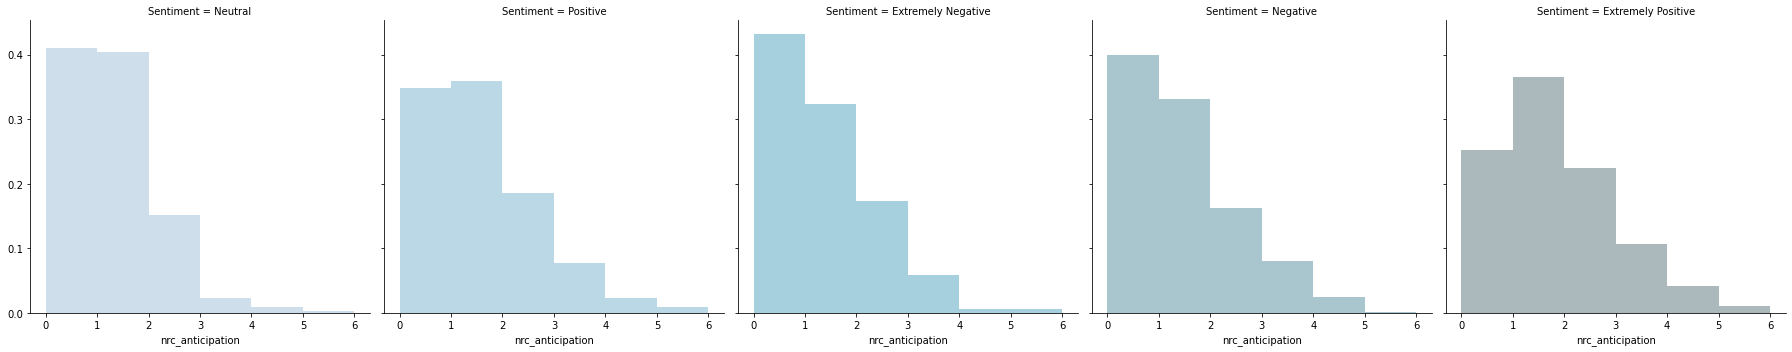

Descriptive stats for nrc_disgust
---------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  0.666667  0.849301  0.0  0.0  0.0  1.0  4.0
Extremely Positive  290.0  0.155172  0.372113  0.0  0.0  0.0  0.0  2.0
Negative            513.0  0.317739  0.574879  0.0  0.0  0.0  1.0  3.0
Neutral             356.0  0.112360  0.341932  0.0  0.0  0.0  0.0  2.0
Positive            535.0  0.142056  0.399447  0.0  0.0  0.0  0.0  2.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


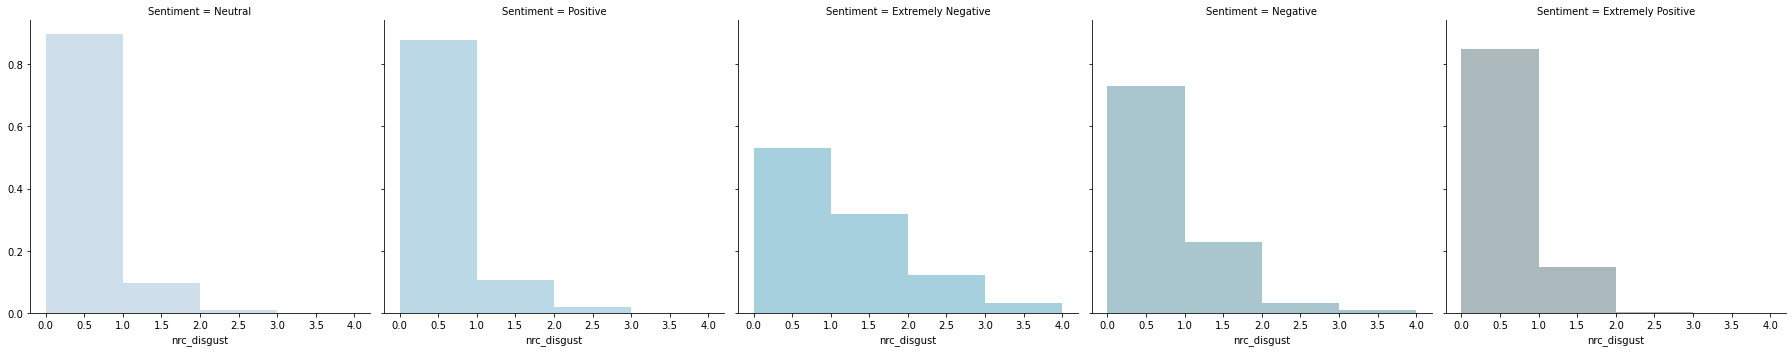

Descriptive stats for nrc_fear
------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  1.663399  1.241799  0.0  1.0  2.0  2.0  6.0
Extremely Positive  290.0  0.579310  0.816516  0.0  0.0  0.0  1.0  5.0
Negative            513.0  0.861598  0.949068  0.0  0.0  1.0  1.0  6.0
Neutral             356.0  0.339888  0.627702  0.0  0.0  0.0  1.0  3.0
Positive            535.0  0.568224  0.840523  0.0  0.0  0.0  1.0  5.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


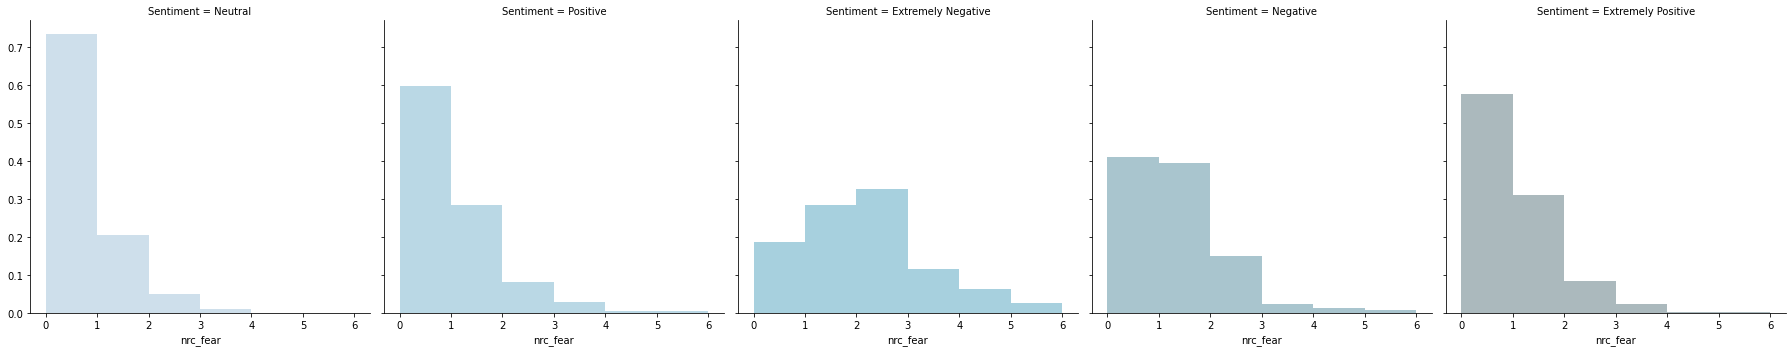

Descriptive stats for nrc_joy
-----------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  0.833333  0.842518  0.0  0.0  1.0  1.0  3.0
Extremely Positive  290.0  1.186207  1.042264  0.0  0.0  1.0  2.0  5.0
Negative            513.0  0.695906  0.859871  0.0  0.0  1.0  1.0  6.0
Neutral             356.0  0.435393  0.695081  0.0  0.0  0.0  1.0  4.0
Positive            535.0  0.831776  0.870726  0.0  0.0  1.0  1.0  5.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


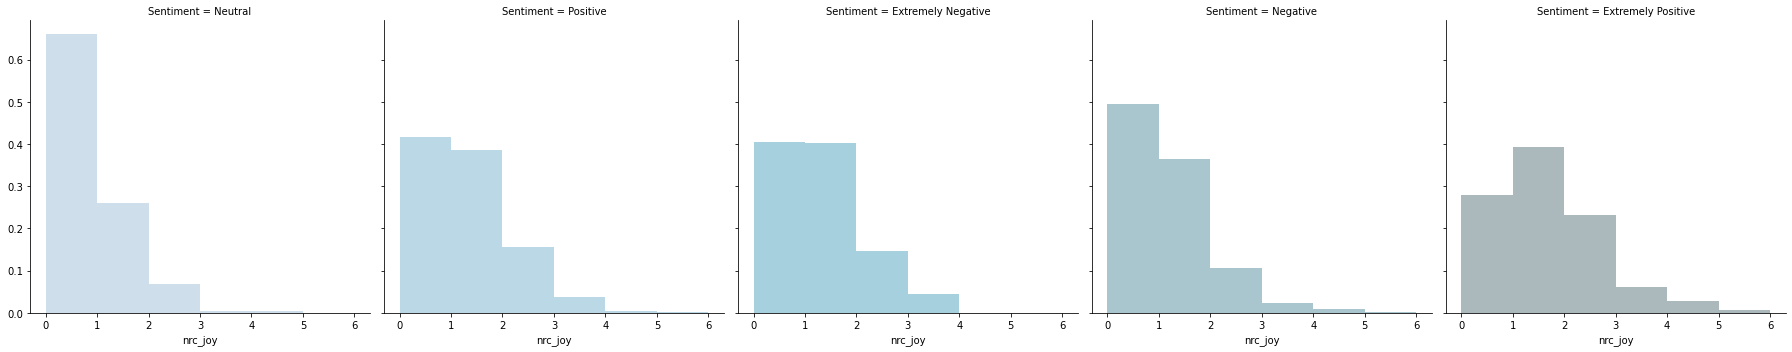

Descriptive stats for nrc_sadness
---------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  0.947712  0.977054  0.0  0.0  1.0  2.0  6.0
Extremely Positive  290.0  0.358621  0.613300  0.0  0.0  0.0  1.0  3.0
Negative            513.0  0.547758  0.796820  0.0  0.0  0.0  1.0  4.0
Neutral             356.0  0.210674  0.506853  0.0  0.0  0.0  0.0  4.0
Positive            535.0  0.370093  0.660158  0.0  0.0  0.0  1.0  4.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


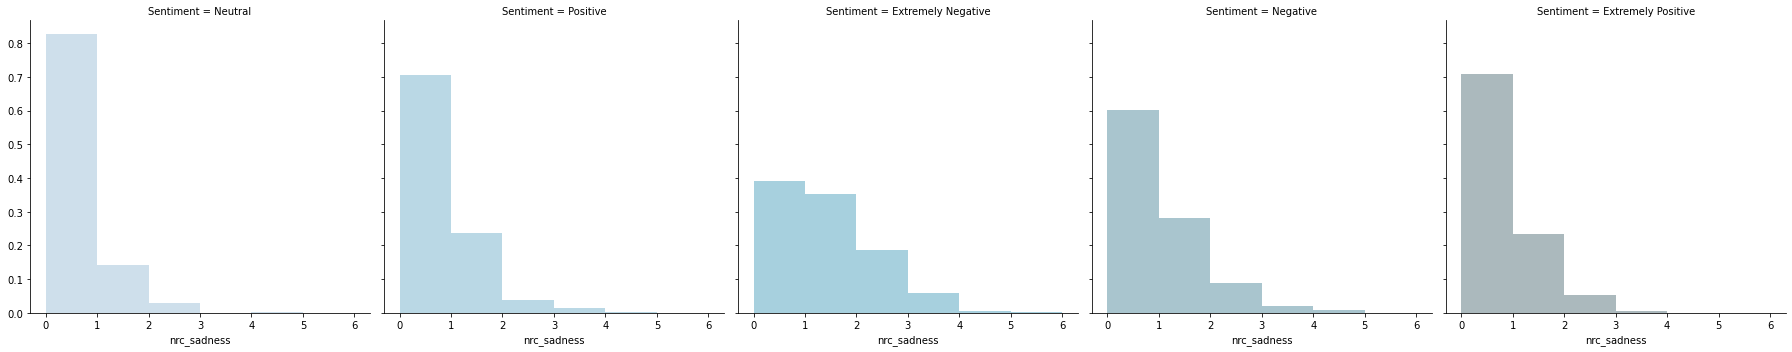

Descriptive stats for nrc_surprise
----------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  0.385621  0.702447  0.0  0.0  0.0  1.0  4.0
Extremely Positive  290.0  0.479310  0.691960  0.0  0.0  0.0  1.0  4.0
Negative            513.0  0.333333  0.586302  0.0  0.0  0.0  1.0  4.0
Neutral             356.0  0.283708  0.504474  0.0  0.0  0.0  1.0  2.0
Positive            535.0  0.411215  0.652757  0.0  0.0  0.0  1.0  4.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


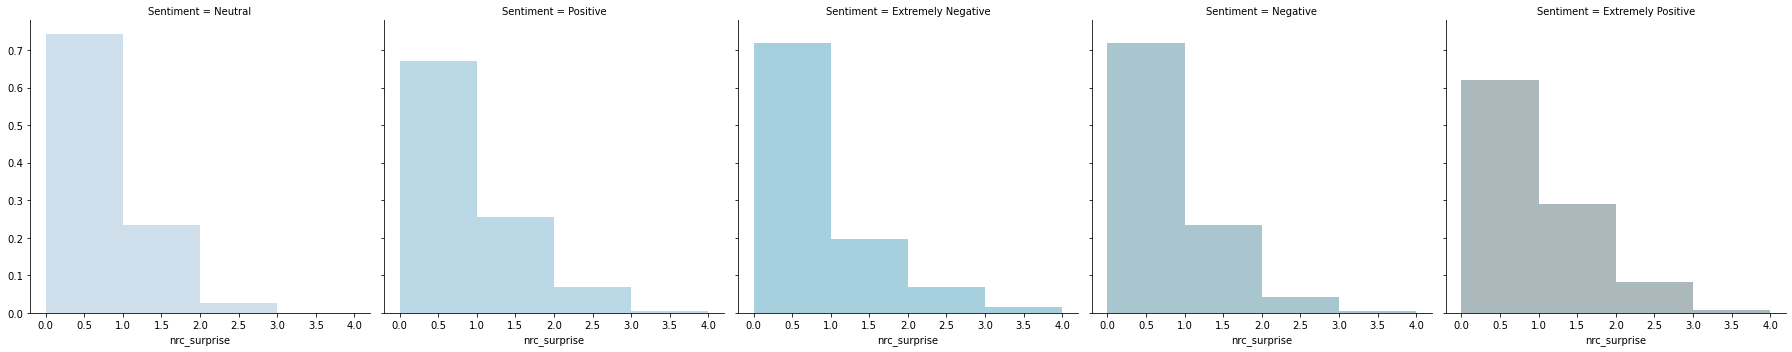

Descriptive stats for nrc_trust
-------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  1.212418  1.106157  0.0  0.0  1.0  2.0  5.0
Extremely Positive  290.0  1.589655  1.304993  0.0  1.0  1.0  2.0  8.0
Negative            513.0  1.146199  1.185883  0.0  0.0  1.0  2.0  8.0
Neutral             356.0  0.716292  0.961726  0.0  0.0  0.0  1.0  4.0
Positive            535.0  1.198131  1.064404  0.0  0.0  1.0  2.0  7.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


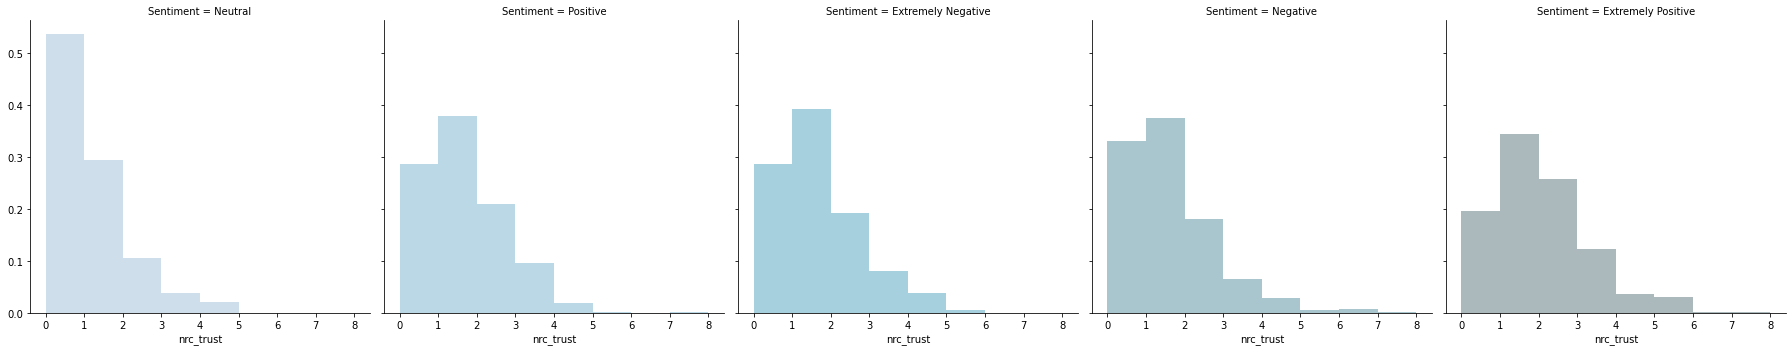

Descriptive stats for mpqa_positive
-----------------------------------
                    count      mean       std  min  25%  50%  75%   max
Sentiment                                                              
Extremely Negative  306.0  1.418301  1.321273  0.0  0.0  1.0  2.0   6.0
Extremely Positive  290.0  2.975862  1.590229  0.0  2.0  3.0  4.0  10.0
Negative            513.0  1.307992  1.298540  0.0  0.0  1.0  2.0   8.0
Neutral             356.0  0.581461  0.956280  0.0  0.0  0.0  1.0   6.0
Positive            535.0  1.822430  1.288185  0.0  1.0  2.0  3.0   6.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


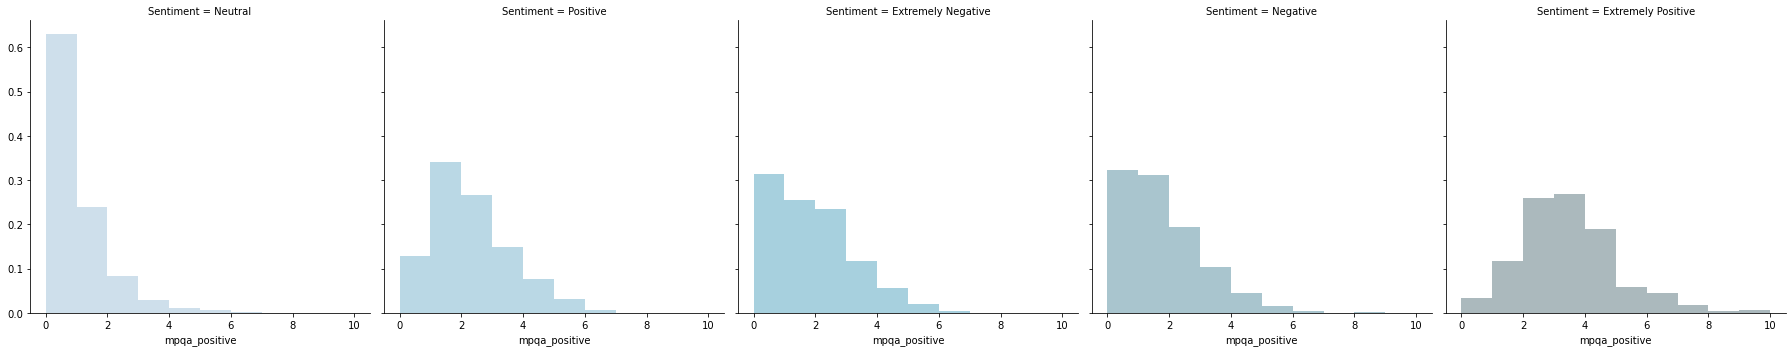

Descriptive stats for mpqa_negative
-----------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  2.754902  1.551961  0.0  2.0  3.0  4.0  9.0
Extremely Positive  290.0  0.893103  1.090516  0.0  0.0  1.0  1.0  5.0
Negative            513.0  1.699805  1.262260  0.0  1.0  1.0  2.0  9.0
Neutral             356.0  0.522472  0.781512  0.0  0.0  0.0  1.0  4.0
Positive            535.0  0.977570  1.036534  0.0  0.0  1.0  2.0  7.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


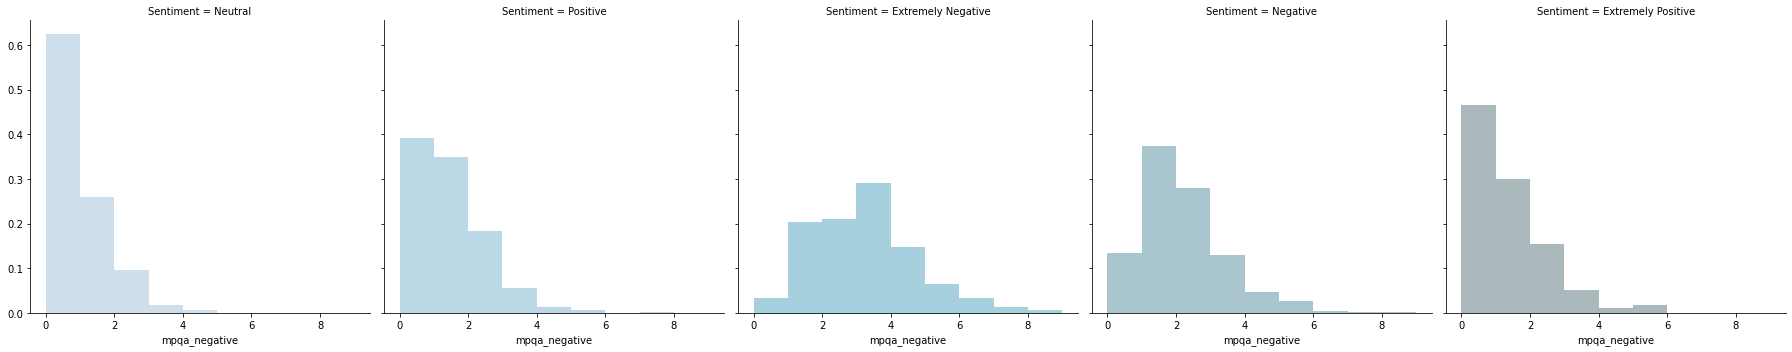

Descriptive stats for mpqa_strong_subjectivty
---------------------------------------------
                    count      mean       std  min  25%  50%  75%   max
Sentiment                                                              
Extremely Negative  306.0  2.689542  1.793894  0.0  1.0  2.0  4.0  10.0
Extremely Positive  290.0  2.186207  1.627983  0.0  1.0  2.0  3.0   9.0
Negative            513.0  1.801170  1.445440  0.0  1.0  2.0  3.0   9.0
Neutral             356.0  0.609551  0.944558  0.0  0.0  0.0  1.0   5.0
Positive            535.0  1.601869  1.350682  0.0  1.0  1.0  2.0   7.0


/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


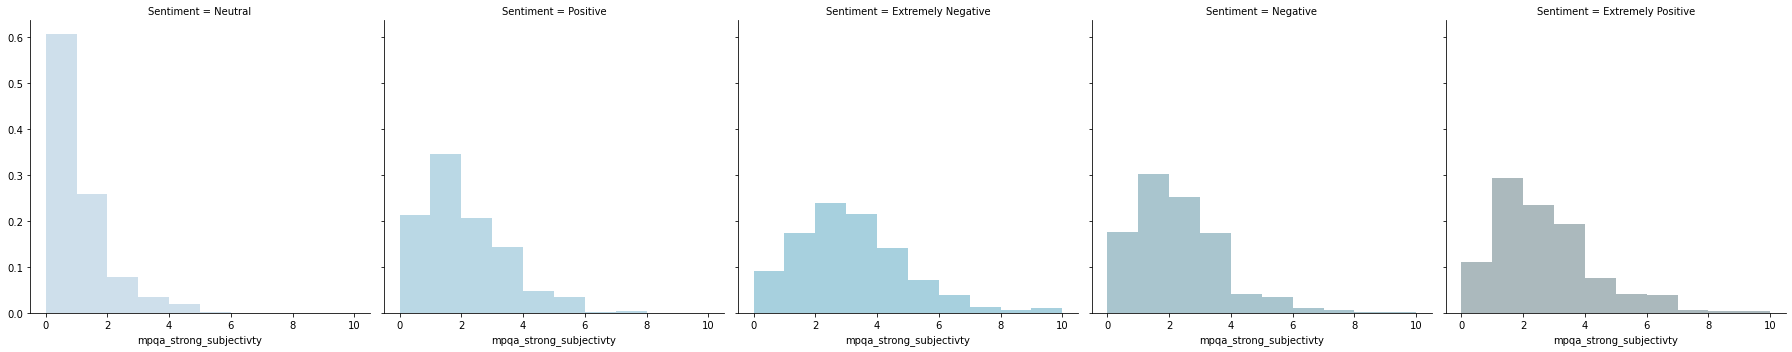

In [10]:
import numpy as np

def show_dist(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('Sentiment')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='Sentiment', height=5, hue='Sentiment', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()

df_eda = pd.concat([train,feat_dat],axis=1)

for feature in sa_extractor.feature_names:
    show_dist(df_eda, feature)

### First step included extracting lexicon-based features. Some of the lexicon-based features had some level of relation with the sentiments based on the mean values:

    • Afinn
        o Afinn_positive has quite strong relation with the sentiments “positive” and
          “extremely positive
        o Afinn_negative has strong relation with the sentiment “extremely negative”
    • Nrc
        o nrc_negative has quite strong relation with the sentiment “extremely negative”
    • Mpqa
        o mpqa_positive has quite strong relation with the sentiment “extremely positive”
    o mpqa_negative has quite strong relation with the sentiment “extremely negative”
    o mpqa_strong_subjectivty has quite strong relations with the sentiments “extremely positive” and “extremely         negative”
    
Other features did not have significant level of relation with the sentiments. In addition, there are likely to be a lot of sentences that do not contain any lexicon features, since in many cases there were a lot of 0 values.

## Step 3: Cleaning the text

It is crucial to clean the text from all the “noise” in order to successfully fit a model to it. By cleaning the text, we ensure that our machine learning system will pick up on the right attributes. Thus, we need to eliminate everything from the text that has adds no value for our analysis.

Cleaning the text includes following steps:
• lowercasing
• removal of punctuations, question and exclamation marks
• removal of urls
• removal of digits
• removal of “stopwords”
• applying stemming

In [14]:
#Let's clean the text data

from sklearn.base import BaseEstimator, TransformerMixin

import nltk
import re, string, os, emoji

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

class CleanText(BaseEstimator, TransformerMixin):
   
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 

    def remove_digits(self, input_text):
        return re.sub(r'\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmikilpelainen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
ct = CleanText()
sent_clean = ct.fit_transform(train.OriginalTweet)
print(sent_clean.sample(5))
empty_clean = sent_clean == ''
print('{} records have no words left after text cleaning'.format(sent_clean[empty_clean].count()))
sent_clean.loc[empty_clean] = '[no_text]'

306     consum shaki ground busi grind covid hear cons...
1605    farmer reli farmersâ market direct consum sal...
96      biggest supermarket chain unit state employe m...
1446    increas onlin shop spread coronaviru covid sar...
117     fring idiot like caus price rise amp creat sho...
Name: OriginalTweet, dtype: object
4 records have no words left after text cleaning


## Step 3. Bag-of-Words (BOW) representation of the data

/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


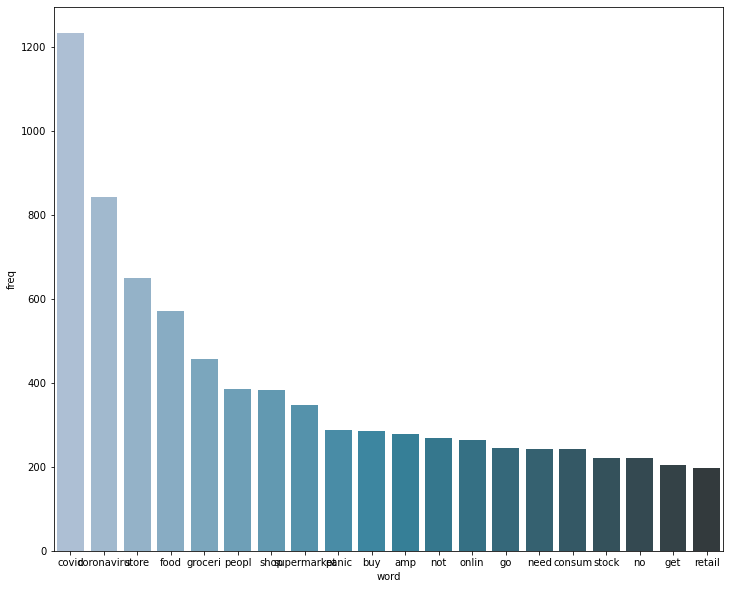

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import collections

cv = CountVectorizer()
bow = cv.fit_transform(sent_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

After creating the BOW representation of the data, we can state the words relating to the actual disease are the most commonly used in tweets. In addition, words related to food and groceries are also very common along with words related to panic. The result is reasonable.

## Step 4. Methods and Results

### Methods

Two models were considered as a part of training the classifiers:
    • Logistic Regression
    • Multinomial Naïve Bayes Classifier
    
To train the models, I’ve used CountVectorizer to convert words to numbers by assigning them an id and counting word frequencies. To mitigate overfitting issues, I’ve used a 5-fold crossvalidation approach to estimate the models.

I defined parameter grid settings for both models.

Parameters for vectorizers:
    • Maximum document frequency (0.25, 0.5, 0.75)
    • How many sentences need to contain the words (1 word needs to appear at least in 2 sentences)
    • Ngram-range (single words and bi-grams)
    
Parameters for logistic regression:
    • Specify the norm used in penalization (‘l1’, ‘l2’)
    • Inverse of regularization strength (0.25, 0.5, 1.0) Parameters for multinomial NB:
    • Additive (Laplace/Lidstone) smoothing parameter (0.25, 0.5, 0.75)

In [17]:
word_counter_df

,word,freq
0,covid,1232
1,coronaviru,843
2,store,650
3,food,570
4,groceri,456
5,peopl,386
6,shop,382
7,supermarket,346
8,panic,288
9,buy,285


In [18]:
df_model = df_eda
df_model['clean_text'] = sent_clean
df_model.columns.tolist()

['UserName',
 'ScreenName',
 'Location',
 'TweetAt',
 'OriginalTweet',
 'Sentiment',
 'afinn_positive',
 'afinn_negative',
 'nrc_positive',
 'nrc_negative',
 'nrc_anger',
 'nrc_anticipation',
 'nrc_disgust',
 'nrc_fear',
 'nrc_joy',
 'nrc_sadness',
 'nrc_surprise',
 'nrc_trust',
 'mpqa_positive',
 'mpqa_negative',
 'mpqa_strong_subjectivty',
 'clean_text']

In [19]:
class ColumnExtractor(TransformerMixin, BaseEstimator):
    def __init__(self, cols):
        self.cols = cols

    def transform(self, X, **transform_params):
        return X[self.cols]

    def fit(self, X, y=None, **fit_params):
        return self

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model.drop('Sentiment', axis=1), df_model.Sentiment, test_size=0.1, random_state=30)

In [21]:
df_model.dtypes

UserName                     int64
ScreenName                   int64
Location                    object
TweetAt                     object
OriginalTweet               object
Sentiment                   object
afinn_positive             float64
afinn_negative             float64
nrc_positive               float64
nrc_negative               float64
nrc_anger                  float64
nrc_anticipation           float64
nrc_disgust                float64
nrc_fear                   float64
nrc_joy                    float64
nrc_sadness                float64
nrc_surprise               float64
nrc_trust                  float64
mpqa_positive              float64
mpqa_negative              float64
mpqa_strong_subjectivty    float64
clean_text                  object
dtype: object

In [22]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

mnb = MultinomialNB()
logreg = LogisticRegression(max_iter=10000, solver='saga')
countvect = CountVectorizer()

In [23]:
#Defining grid-search routine to perform the cross-validation

from pprint import pprint
from time import time

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

def grid_vect(clf, parameters_clf, X_train, X_test, y_train, y_test, parameters_text=None, vect=None):
    
    textcountscols = ['afinn_positive', 'afinn_negative', 'nrc_positive', 'nrc_negative', 'nrc_anger', 'nrc_anticipation', 'nrc_disgust',
                     'nrc_fear', 'nrc_joy', 'nrc_sadness', 'nrc_surprise', 'nrc_trust', 'mpqa_positive', 'mpqa_negative', 'mpqa_strong_subjectivty']
    
    features = FeatureUnion([('textcounts', ColumnExtractor(cols=textcountscols))
                                 , ('pipe', Pipeline([('cleantext', ColumnExtractor(cols='clean_text')), ('vect', vect)]))]
                                , n_jobs=-1)
  
    pipeline = Pipeline([
        ('features', features)
        , ('clf', clf)
    ])
    
    # Join the parameters dictionaries together
    parameters = dict()
    if parameters_text:
        parameters.update(parameters_text)
    parameters.update(parameters_clf)

    # Make sure you have scikit-learn version 0.19 or higher to use multiple scoring metrics
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=5)
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)

    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best CV score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    print("Test score with best_estimator_: %0.3f" % grid_search.best_estimator_.score(X_test, y_test))
    print("\n")
    print("Classification Report Test Data")
    print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))
                        
    return grid_search

In [24]:
# Parameter grid settings for the vectorizers (Count and TFIDF)
parameters_vect = {
    'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
    'features__pipe__vect__ngram_range': ((1, 1), (1, 2)),
    'features__pipe__vect__min_df': (1,2)
}

# Parameter grid settings for LogisticRegression
parameters_logreg = {
    'clf__C': (0.25, 0.5, 1.0),
    'clf__penalty': ('l1', 'l2')
}

# Parameter grid settings for MultinomialNB
parameters_mnb = {
    'clf__alpha': (0.25, 0.5, 0.75)
}



In [25]:
# LogisticRegression
best_logreg_countvect = grid_vect(logreg, parameters_logreg, X_train, X_test, y_train, y_test, parameters_text=parameters_vect, vect=countvect)



Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__C': (0.25, 0.5, 1.0),
 'clf__penalty': ('l1', 'l2'),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 72 candidates, totalling 360 fits
done in 4099.921s

Best CV score: 0.643
Best parameters set:
	clf__C: 0.25
	clf__penalty: 'l1'
	features__pipe__vect__max_df: 0.25
	features__pipe__vect__min_df: 1
	features__pipe__vect__ngram_range: (1, 2)
Test score with best_estimator_: 0.625


Classification Report Test Data
                    precision    recall  f1-score   support

Extremely Negative       0.78      0.68      0.72        31
Extremely Positive       0.86      0.58      0.69        33
          Negative       0.55      0.46      0.50        50
           Neutral       0.58      0.91      0.71        35
          Positive       0.56      0.59      0.57        51

          accuracy 

In [27]:
logreg_test_preds = X_test.loc[:, ['OriginalTweet']]
logreg_test_preds['Sentiment']=y_test
logreg_test_preds['pred']=best_logreg_countvect.predict(X_test)
logreg_test_preds

,OriginalTweet,Sentiment,pred
1856,"Guess?, Inc. Provides COVID-19 Business Update...",Positive,Positive
364,Economic Perspectives - Global Inflation Persp...,Negative,Positive
1948,@NewYorker My friends in #Strasbourg #france s...,Positive,Positive
1458,9 Online Grocery Shopping Stores In Klang Vall...,Neutral,Neutral
609,@DrAmalinaBakri Saw someone shared on what kin...,Positive,Positive
...,...,...,...
1992,"@N_Mazibuk0 Let's all be accurate, there's NO ...",Extremely Negative,Extremely Negative
1942,I donÂt want to work at a grocery store anymo...,Positive,Positive
470,"Oh my God, even after coming up with a list of...",Negative,Extremely Negative
314,Shit moms.. I just got done telling my kids ho...,Positive,Positive


In [28]:
# Estimate Naive Bayes model

mnb = MultinomialNB()
countvect = CountVectorizer()

# MultinomialNB
best_mnb_countvect = grid_vect(mnb, parameters_mnb, X_train, X_test, y_train, y_test, parameters_text=parameters_vect, vect=countvect)

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__alpha': (0.25, 0.5, 0.75),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
done in 24.055s

Best CV score: 0.529
Best parameters set:
	clf__alpha: 0.75
	features__pipe__vect__max_df: 0.75
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 1)
Test score with best_estimator_: 0.570


Classification Report Test Data
                    precision    recall  f1-score   support

Extremely Negative       0.56      0.65      0.60        31
Extremely Positive       0.59      0.52      0.55        33
          Negative       0.50      0.48      0.49        50
           Neutral       0.75      0.69      0.72        35
          Positive       0.53      0.57      0.55        51

          accuracy                           0.57       200
   

In [30]:
mnb_test_preds = X_test.loc[:, ['OriginalTweet']]
mnb_test_preds['Sentiment']=y_test
mnb_test_preds['pred']=best_mnb_countvect.predict(X_test)
mnb_test_preds

,OriginalTweet,Sentiment,pred
1856,"Guess?, Inc. Provides COVID-19 Business Update...",Positive,Neutral
364,Economic Perspectives - Global Inflation Persp...,Negative,Extremely Negative
1948,@NewYorker My friends in #Strasbourg #france s...,Positive,Positive
1458,9 Online Grocery Shopping Stores In Klang Vall...,Neutral,Neutral
609,@DrAmalinaBakri Saw someone shared on what kin...,Positive,Positive
...,...,...,...
1992,"@N_Mazibuk0 Let's all be accurate, there's NO ...",Extremely Negative,Extremely Negative
1942,I donÂt want to work at a grocery store anymo...,Positive,Positive
470,"Oh my God, even after coming up with a list of...",Negative,Extremely Negative
314,Shit moms.. I just got done telling my kids ho...,Positive,Negative


### Results

After training the models we can state that based on the statistics Logistic Regression performed better with the best CV score of 0.643 and model accuracy f1-score of 0.62. Overall, both models performed quite poorly.